In [120]:
from __future__ import division
import numpy as np
from scipy.io.wavfile import read
from LBG import lbg
from LPC import lpc
from python_speech_features import mfcc as mfcc_p
import matplotlib.pyplot as plt
import os

In [121]:
colors = ['#DEB887','#A1EAFB','#CFEE91','#FFFF99','#49BEB7','#F0DC82','#FF69B4','#D22D1E']
colorsBright = ('#911eb4','#f58231','#ffe119','#3cb44b','#e6194b','#008080','#F0DC82','#FF69B4')

In [122]:
def training(nfiltbank, orderLPC):
    #Get directory and list of *.wav files
    directory = os.getcwd() + '/train_all_speakers'
    wave_files = [f for f in os.listdir(directory)]

    nSpeaker = len(wave_files)
    nCentroid = 16  # original is 16
    codebooks_mfcc = np.empty((nSpeaker, nfiltbank, nCentroid))
    codebooks_lpc = np.empty((nSpeaker, orderLPC, nCentroid))

    for i, wave_file in enumerate(wave_files):
        fname = '/' + wave_file
        print 'Speaker [' + str(i) + ']    File:' + wave_file + '    Training features...'
        (fs, s) = read(directory + fname)
        mel_coeff = mfcc_p(s, fs)
        mel_coeff = mel_coeff.transpose()
        mel_coeff[0, :] = np.zeros(mel_coeff.shape[1])

        lpc_coeff = lpc(s, fs, orderLPC)
        codebooks_mfcc[i, :, :] = lbg(mel_coeff, nCentroid)
        codebooks_lpc[i, :, :] = lbg(lpc_coeff, nCentroid)
    
    print('Training finished\n')

    #plotting 5th and 6th dimension MFCC features on a 2D plane
    #comment lines 54 to 71 if you don't want to see codebook
    codebooks = np.empty((2, nfiltbank, nCentroid))
    mel_coeff = np.empty((2, nfiltbank, 68))
    
    for i, wave in enumerate([wave_files[10],wave_files[11]]):
        fname = '/' + wave
        (fs,s) = read(directory + fname)
        
        saver = mfcc_p(s, fs)
        saver = saver.transpose()[:,0:68]
        saver[0,:] = np.zeros(saver.shape[1])
        mel_coeff[i,:,:] = saver
        #mel_coeff[i, :, :] = saver.transpose()[:,0:68]
        codebooks[i,:,:] = lbg(mel_coeff[i,:,:], nCentroid)
    
    
    plt.figure(nSpeaker + 1,figsize=(10,10))
    s1 = plt.scatter(mel_coeff[0,6,:], mel_coeff[0,4,:],s = 100,  color = '#DA0463', marker = '+')
    c1 = plt.scatter(codebooks[0,6,:], codebooks[0,4,:], s = 100, color = '#DA0463', marker = 'o')
    s2 = plt.scatter(mel_coeff[1,6,:], mel_coeff[1,4,:],s = 100,  color = '#1CA2BB', marker = '+')
    c2 = plt.scatter(codebooks[1,6,:], codebooks[1,4,:], s = 100, color = '#1CA2BB', marker = 'o')
    plt.grid()
    plt.legend((s1, s2, c1, c2), ('Sp1','Sp2','Sp1 centroids', 'Sp2 centroids'), scatterpoints = 1, loc = 'upper left')
    plt.show()


    return (codebooks_mfcc, codebooks_lpc)
           

Speaker [0]    File:f_speaker1.wav    Training features...
Speaker [1]    File:f_speaker2.wav    Training features...
Speaker [2]    File:f_speaker3.wav    Training features...
Speaker [3]    File:f_speaker4.wav    Training features...
Speaker [4]    File:f_speaker5.wav    Training features...
Speaker [5]    File:f_speaker6.wav    Training features...
Speaker [6]    File:f_speaker7.wav    Training features...
Speaker [7]    File:f_speaker8.wav    Training features...
Speaker [8]    File:m_speaker09.wav    Training features...
Speaker [9]    File:m_speaker10.wav    Training features...
Speaker [10]    File:m_speaker11.wav    Training features...
Speaker [11]    File:m_speaker12.wav    Training features...
Speaker [12]    File:m_speaker13.wav    Training features...
Speaker [13]    File:m_speaker14.wav    Training features...
Speaker [14]    File:m_speaker15.wav    Training features...
Speaker [15]    File:m_speaker16.wav    Training features...
Training finished



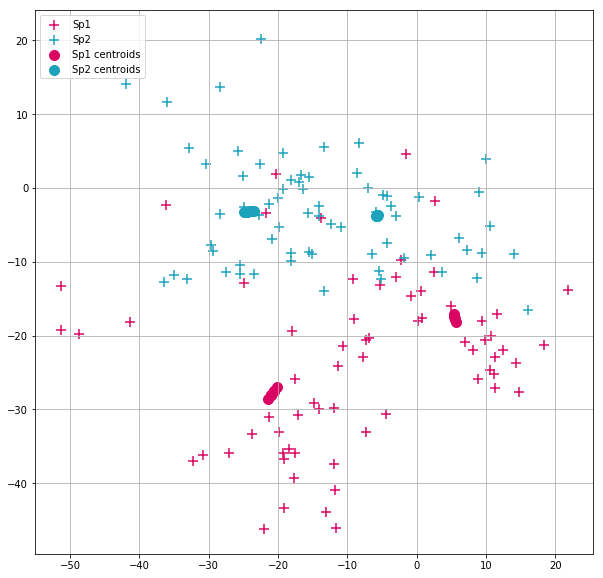

In [123]:
#Start training on speakers. Call training file function
nfiltbank = 13  # was 12
orderLPC = 15
(codebooks_mfcc, codebooks_lpc) = training(nfiltbank, orderLPC)

In [124]:
#good comparison speakers are indexes 10 and 11


In [125]:
def training(nfiltbank, orderLPC,mf):
    #Get directory and list of *.wav files
    directory = os.getcwd() + '/train_all_speakers'
    wave_files = [f for f in os.listdir(directory)]

    nSpeaker = len(wave_files)
    nCentroid = 16  # original is 16
    codebooks_mfcc = np.empty((nSpeaker, nfiltbank, nCentroid))
    codebooks_lpc = np.empty((nSpeaker, orderLPC, nCentroid))

    for i, wave_file in enumerate(wave_files):
        fname = '/' + wave_file
        print 'Speaker [' + str(i) + ']    File:' + wave_file + '    Training features...'
        (fs, s) = read(directory + fname)
        mel_coeff = mfcc_p(s, fs)
        mel_coeff = mel_coeff.transpose()
        mel_coeff[0, :] = np.zeros(mel_coeff.shape[1])

        lpc_coeff = lpc(s, fs, orderLPC)
        codebooks_mfcc[i, :, :] = lbg(mel_coeff, nCentroid)
        codebooks_lpc[i, :, :] = lbg(lpc_coeff, nCentroid)
    
    print('Training finished\n')

    #plotting 5th and 6th dimension MFCC features on a 2D plane
    #comment lines 54 to 71 if you don't want to see codebook
    codebooks = np.empty((len(wave_files), nfiltbank, nCentroid))
    mel_coeff = np.empty((len(wave_files), nfiltbank, 68))
    
    if mf == 'Female':
        waves = wave_files[0:8]
    else:
        waves = wave_files[8:16]
    
    for i, wave in enumerate(waves):
        fname = '/' + wave
        (fs,s) = read(directory + fname)
        
        saver = mfcc_p(s, fs)
        saver = saver.transpose()[:,0:68]
        saver[0,:] = np.zeros(saver.shape[1])
        mel_coeff[i,:,:] = saver
        #mel_coeff[i, :, :] = saver.transpose()[:,0:68]
        codebooks[i,:,:] = lbg(mel_coeff[i,:,:], nCentroid)
    
    
    plt.figure(nSpeaker + 1,figsize=(20,20))
    list_of_ledgends = []
    list_of_labels = []
    for i,col in enumerate(colorsBright):
        s1 = plt.scatter(mel_coeff[i,6,:], mel_coeff[i,4,:],s = 100,  color = col, marker = '+')
        
        list_of_ledgends.append(s1)
        
    for i,col in enumerate(colorsBright):
        c1 = plt.scatter(codebooks[i,6,:], codebooks[i,4,:], s = 100, color = col, marker = 'o')
        list_of_ledgends.append(c1)
    for i in range(int(len(colors))):
        list_of_labels.append('Sp'+str(i))
    for i in range(int(len(colors))):
        list_of_labels.append('Sp'+str(i)+" centroids")
    plt.grid()
    plt.legend(list_of_ledgends, list_of_labels, scatterpoints = 1, loc = 'upper left')
    plt.show()


    return (codebooks_mfcc, codebooks_lpc)
    

Speaker [0]    File:f_speaker1.wav    Training features...
Speaker [1]    File:f_speaker2.wav    Training features...
Speaker [2]    File:f_speaker3.wav    Training features...
Speaker [3]    File:f_speaker4.wav    Training features...
Speaker [4]    File:f_speaker5.wav    Training features...
Speaker [5]    File:f_speaker6.wav    Training features...
Speaker [6]    File:f_speaker7.wav    Training features...
Speaker [7]    File:f_speaker8.wav    Training features...
Speaker [8]    File:m_speaker09.wav    Training features...
Speaker [9]    File:m_speaker10.wav    Training features...
Speaker [10]    File:m_speaker11.wav    Training features...
Speaker [11]    File:m_speaker12.wav    Training features...
Speaker [12]    File:m_speaker13.wav    Training features...
Speaker [13]    File:m_speaker14.wav    Training features...
Speaker [14]    File:m_speaker15.wav    Training features...
Speaker [15]    File:m_speaker16.wav    Training features...
Training finished



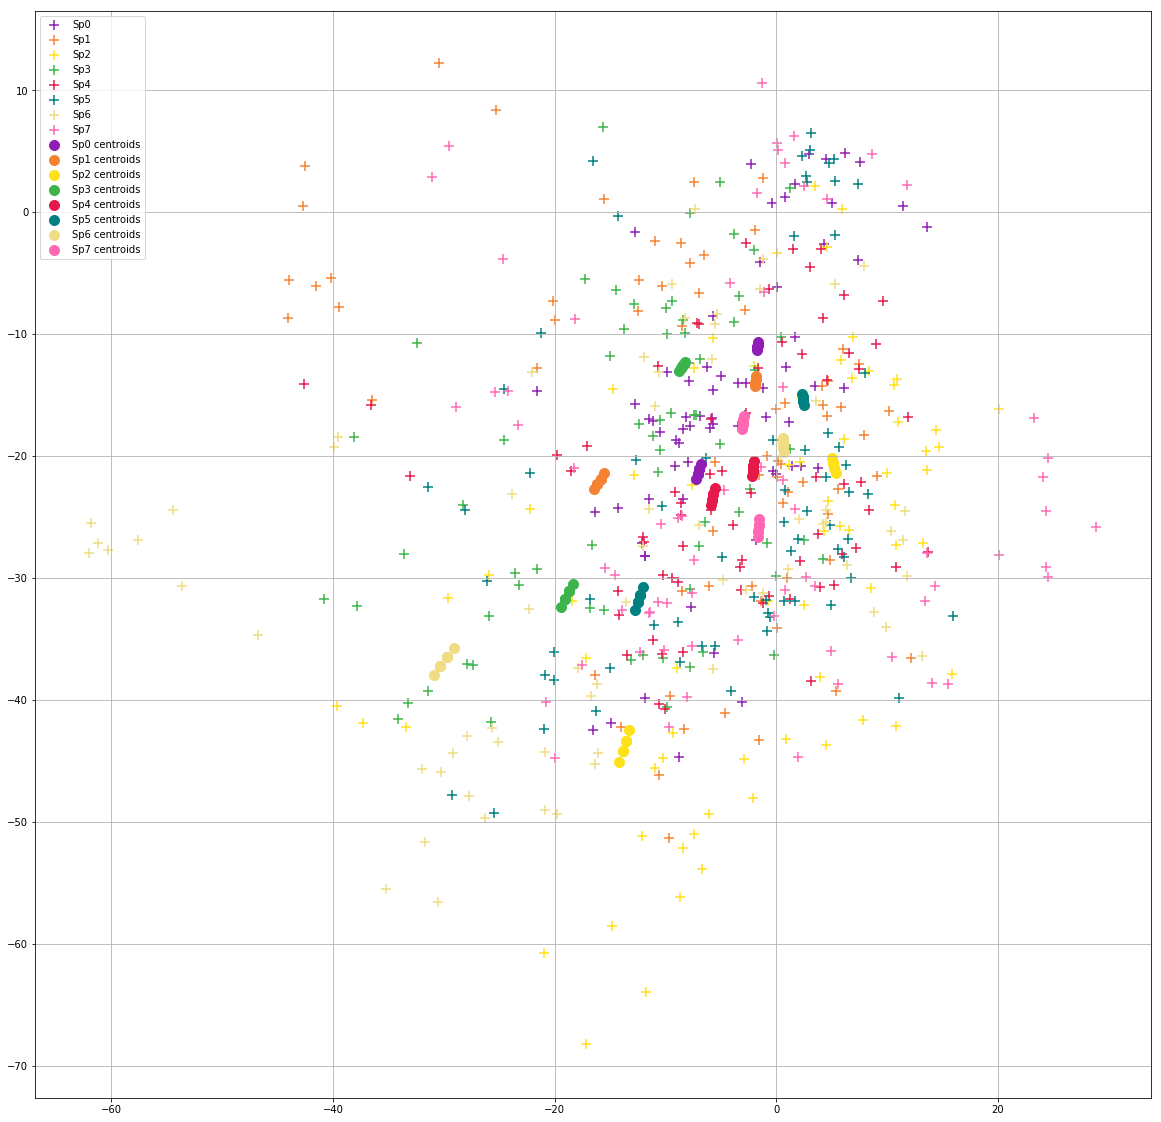

In [126]:
#Start training on speakers. Call training file function
nfiltbank = 13  # was 12
orderLPC = 15
(codebooks_mfcc, codebooks_lpc) = training(nfiltbank, orderLPC,'Female')

Speaker [0]    File:f_speaker1.wav    Training features...
Speaker [1]    File:f_speaker2.wav    Training features...
Speaker [2]    File:f_speaker3.wav    Training features...
Speaker [3]    File:f_speaker4.wav    Training features...
Speaker [4]    File:f_speaker5.wav    Training features...
Speaker [5]    File:f_speaker6.wav    Training features...
Speaker [6]    File:f_speaker7.wav    Training features...
Speaker [7]    File:f_speaker8.wav    Training features...
Speaker [8]    File:m_speaker09.wav    Training features...
Speaker [9]    File:m_speaker10.wav    Training features...
Speaker [10]    File:m_speaker11.wav    Training features...
Speaker [11]    File:m_speaker12.wav    Training features...
Speaker [12]    File:m_speaker13.wav    Training features...
Speaker [13]    File:m_speaker14.wav    Training features...
Speaker [14]    File:m_speaker15.wav    Training features...
Speaker [15]    File:m_speaker16.wav    Training features...
Training finished



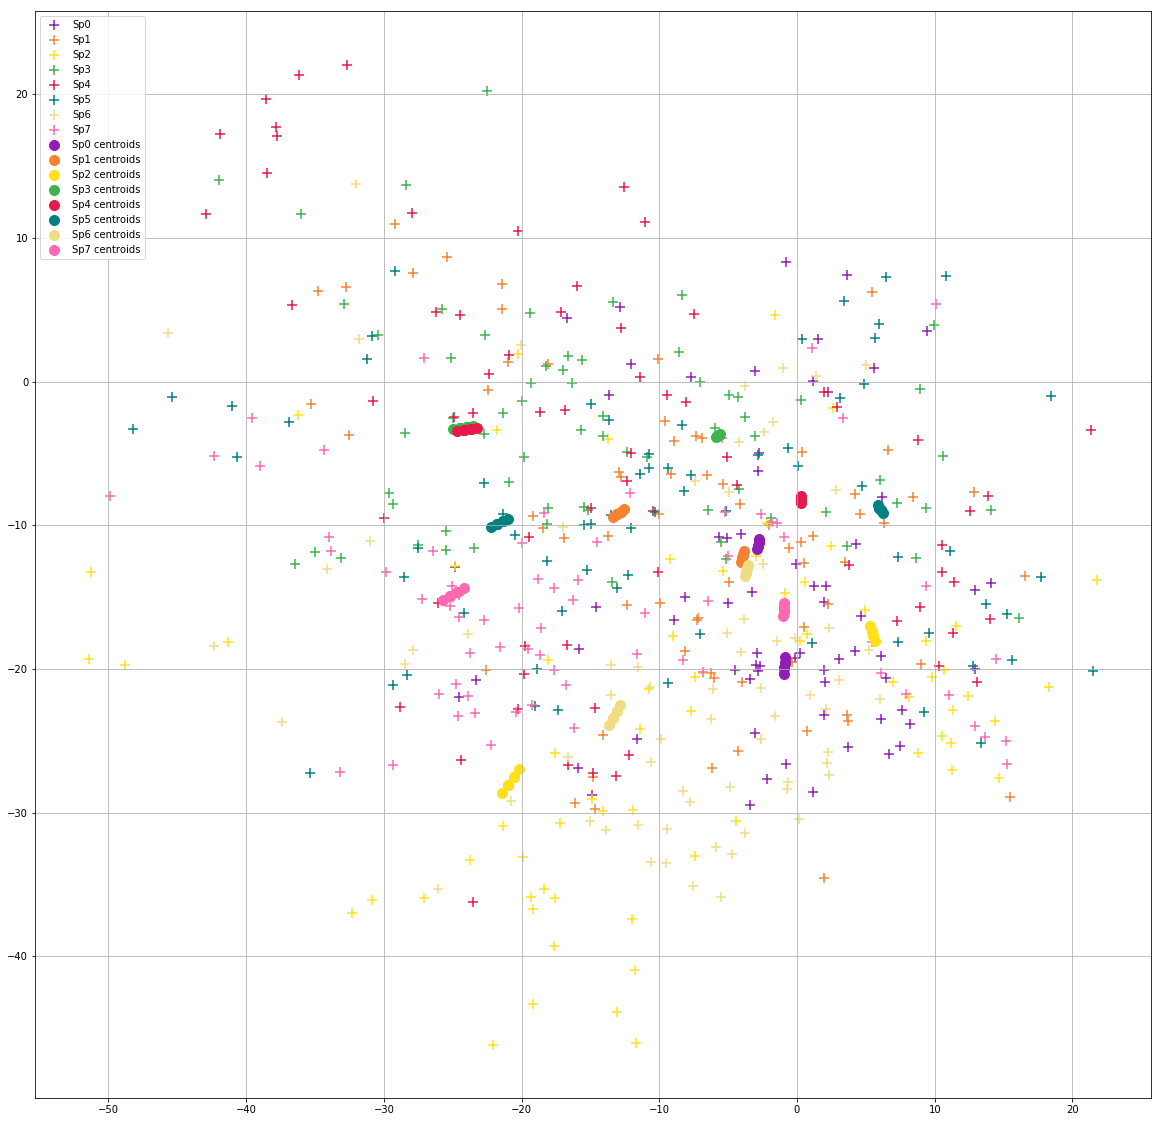

In [127]:
(codebooks_mfcc, codebooks_lpc) = training(nfiltbank, orderLPC,'Male')